In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
import pandas as pd

In [197]:
g = 3
data = []
for x in np.linspace(10, 2500, 1000):
    # print(x)
    y = np.random.negative_binomial(x / (g - 1), 1 / g, 1000)
#     y = np.random.poisson(x, 10000)
#     y = np.random.normal(x, np.sqrt(x*3), 1000)
#     print(np.mean(y), np.var(y))
#     print(np.mean(y), np.std(y))
    data.append(y)

data = np.array(data)

In [3]:
h5f = h5py.File("../../data/Testreihe_LAP/t000stack.h5", 'r')
data = h5f['data'][:, 600:1500, 900:1700]
data = np.swapaxes(data, 0, -1).astype(np.float64)

In [7]:
h5f = h5py.File("../../data/PM/Test500.h5", 'r')
data = h5f['data'][...]
data = np.swapaxes(data, 0, -1).astype(np.float64)

In [11]:
mean = np.mean(data, -1).ravel()
var = np.var(data, -1).ravel()
print(var.shape)
print(data.shape, mean.shape)

# mean = mean[var < 42000]
# var = var[var < 42000]
# var = var[mean < 8000]
# mean = mean[mean < 8000]

mean = mean[var < 250]
var = var[var < 250]
# var = var[mean < 8000]
# mean = mean[mean < 8000]

H, X, Y = np.histogram2d(mean, var, (100, 50))

df = pd.DataFrame()
for x0, x1 in zip(X[:-1], X[1:]):
    v = var[np.logical_and(mean >= x0, mean < x1)]
#     print(v)
    x = (x0 + x0) / 2
#     m = np.nanmean(v)
#     s = np.nanstd(v)
#     print(x, m, s, m / x)

    df = df.append({'x': x, 'data': v}, ignore_index=True)
#     chunks.append(((x0+x1)/2,v))
df = df.explode('data')

(4194304,)
(2048, 2048, 500) (4194304,)


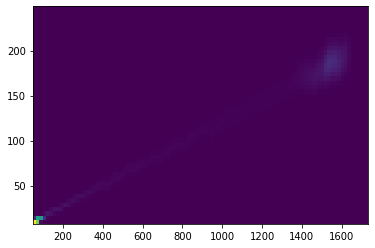

In [12]:
_ = plt.hist2d(mean.ravel(), var.ravel(), (100, 50))

<AxesSubplot:xlabel='x', ylabel='data'>

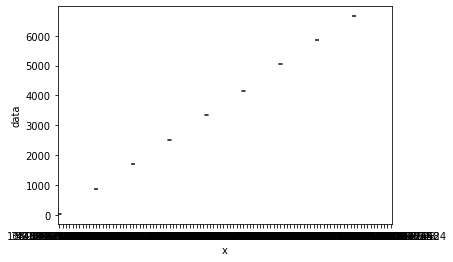

In [171]:
sns.boxplot(x="x", y="data",data=df)

ValueError: autodetected range of [nan, nan] is not finite

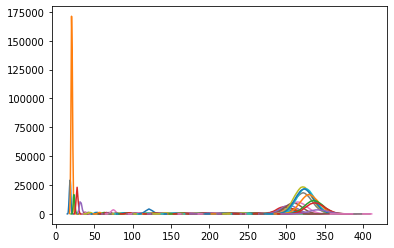

In [13]:
for x in df.x.unique():
    h, x = np.histogram(df[df.x==x].data.to_numpy(), bins=42)
    x = x[:-1] + (x[0]+x[1])/2
    
    plt.plot(x,h)
    #     plt.hist(df[df.x==x].data.to_numpy())

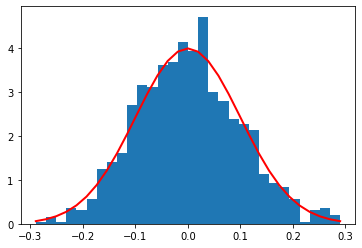

In [158]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

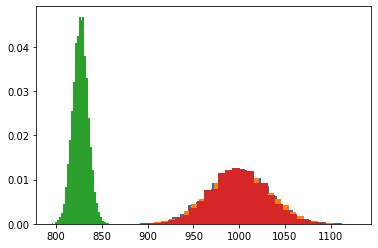

In [87]:
g = 1.1
N = 10000
data = []
I = 1000

y = np.random.negative_binomial(I / (g - 1), 1 / g, N)
plt.hist(y, 30, density=True)

y = np.random.normal(I, np.sqrt(g*I), N)
plt.hist(y, 30, density=True)

y = np.random.gamma(I/(g-1), 1/g*(1-1/g), N)
plt.hist(y, 30, density=True)

y = np.random.poisson(I,  N)
plt.hist(y, 30, density=True)

plt.show()

# h, x = np.hist(y)
# plt.plot(x[:-1], h)

# for x in np.linspace(10, 2500, 1000):
#     # print(x)
#     y = np.random.negative_binomial(x / (g - 1), 1 / g, 1000)
# #     y = np.random.poisson(x, 10000)
# #     y = np.random.normal(x, np.sqrt(x*3), 1000)
# #     print(np.mean(y), np.var(y))
# #     print(np.mean(y), np.std(y))
#     data.append(y)

# data = np.array(data)